In [1]:
import pydelaunay
from interp import Linear2DInterpolator
import numpy as np

In [2]:
points = np.random.randint(low=0, high=2**10, size=(2**10, 2))
points = np.unique(points, axis=0)
points.shape

(1024, 2)

In [3]:
triangulation = pydelaunay.delaunay(points)
triangulation.vertices.shape, triangulation.triangles.shape

3049 

((1024, 2), (2026, 3))

2026 1024
3049 2026 1024
2


In [4]:
interp = Linear2DInterpolator(points, np.random.uniform(size=(len(points),)))
_ = interp(np.unique(np.random.randint(low=0, high=2048, size=(2**10, 2)), axis=0))

### Find triangle, with a given point inside

p = [128, 128]
t_index: int = triangulation.find_triangle(*p)
print(f'triangle index = {t_index}\n triangles vertices are = {triangulation.vertices[triangulation.triangles[t_index]]}')


### Plotting delaunay graph

In [ ]:
import networkx as nx
from tqdm.notebook import tqdm
from itertools import combinations
from matplotlib import pyplot as plt

  0%|          | 0/2028 [00:00<?, ?it/s]

493


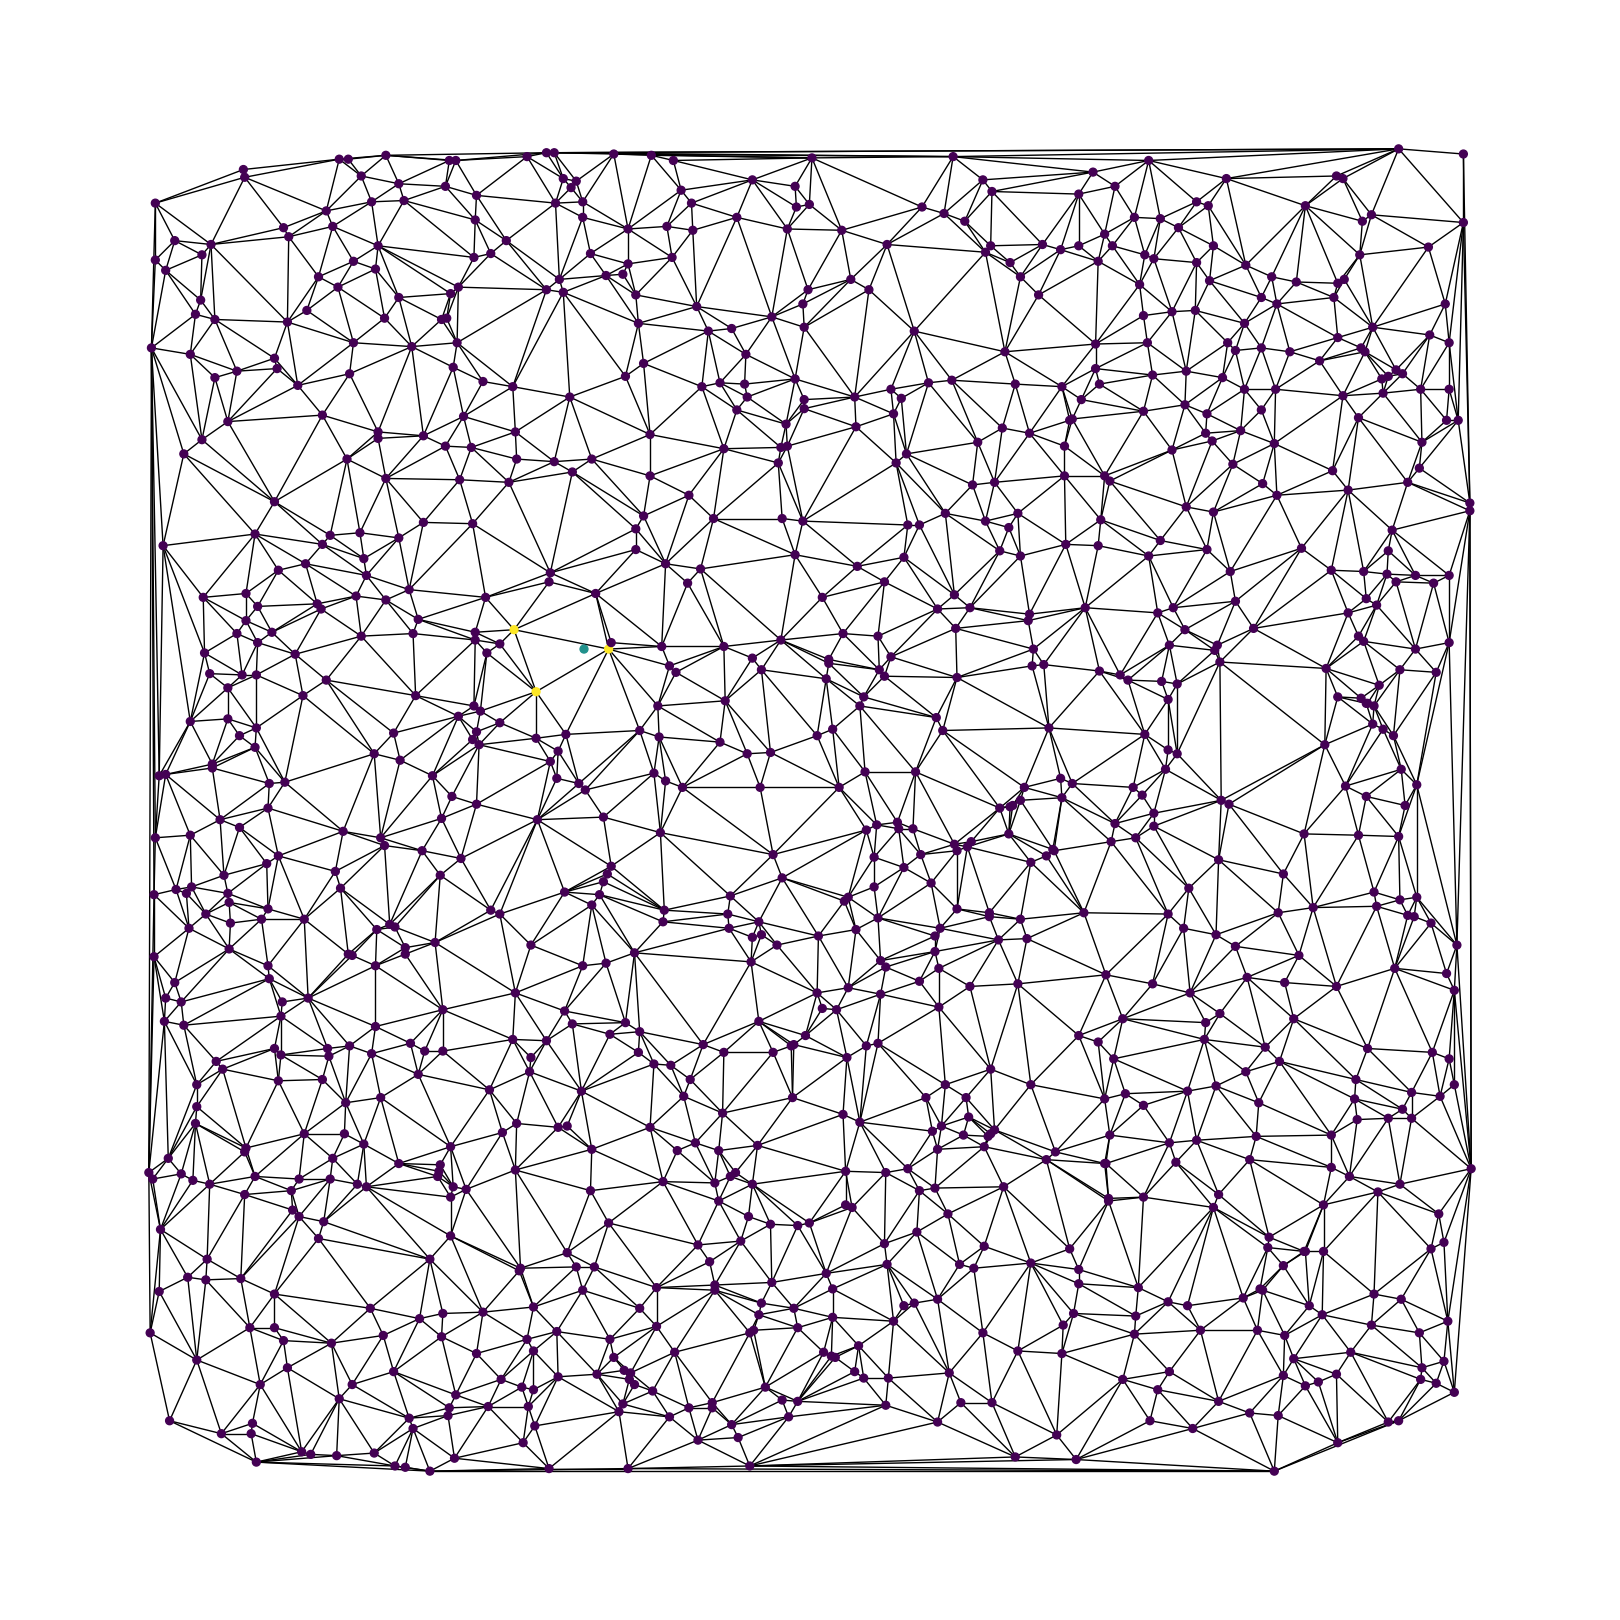

In [ ]:
G = nx.Graph()
cmap = {}
vertices = triangulation.vertices.astype(np.int32)
for t in tqdm(triangulation.triangles):
    vertices = list(map(tuple, triangulation.vertices[t].astype(int)))
    for v in vertices:
        G.add_node(v)
        cmap[v] = 0.0
    for u, v in combinations(vertices, 2):
        G.add_edge(*sorted([u, v]))
v = tuple(np.random.randint(low=0, high=2**10, size=(2, )))
while v in G.nodes:
    v = tuple(np.random.randint(low=0, high=2**10, size=(2, )))
# v = (1600, 2500)
G.add_node(v)
cmap[v] = 1
t = triangulation.find_triangle_bruteforce(*v)
print(t)
if t != -1:
    for u in triangulation.vertices[triangulation.triangles[t]]:
        cmap[tuple(u)] = 2
plt.figure(figsize=(16, 16))
nx.draw(G, pos={n: n for n in G.nodes}, node_size=32, cmap=plt.get_cmap('viridis'), node_color=[cmap.get(n, 0) for n in G.nodes])

### Plotting SciPy Delaunay graph

In [ ]:
from scipy.spatial import Delaunay

In [ ]:
sptri = Delaunay(points)
sptri_points = sptri.points.astype(np.int32)

In [ ]:
S = nx.Graph()
for t in tqdm(sptri.simplices):
    vertices = list(map(tuple, sptri_points[t]))
    for u in vertices:
        S.add_node(u)
    for u, s in combinations(vertices, 2):
        S.add_edge(*sorted([u, s]))

  0%|          | 0/2028 [00:00<?, ?it/s]

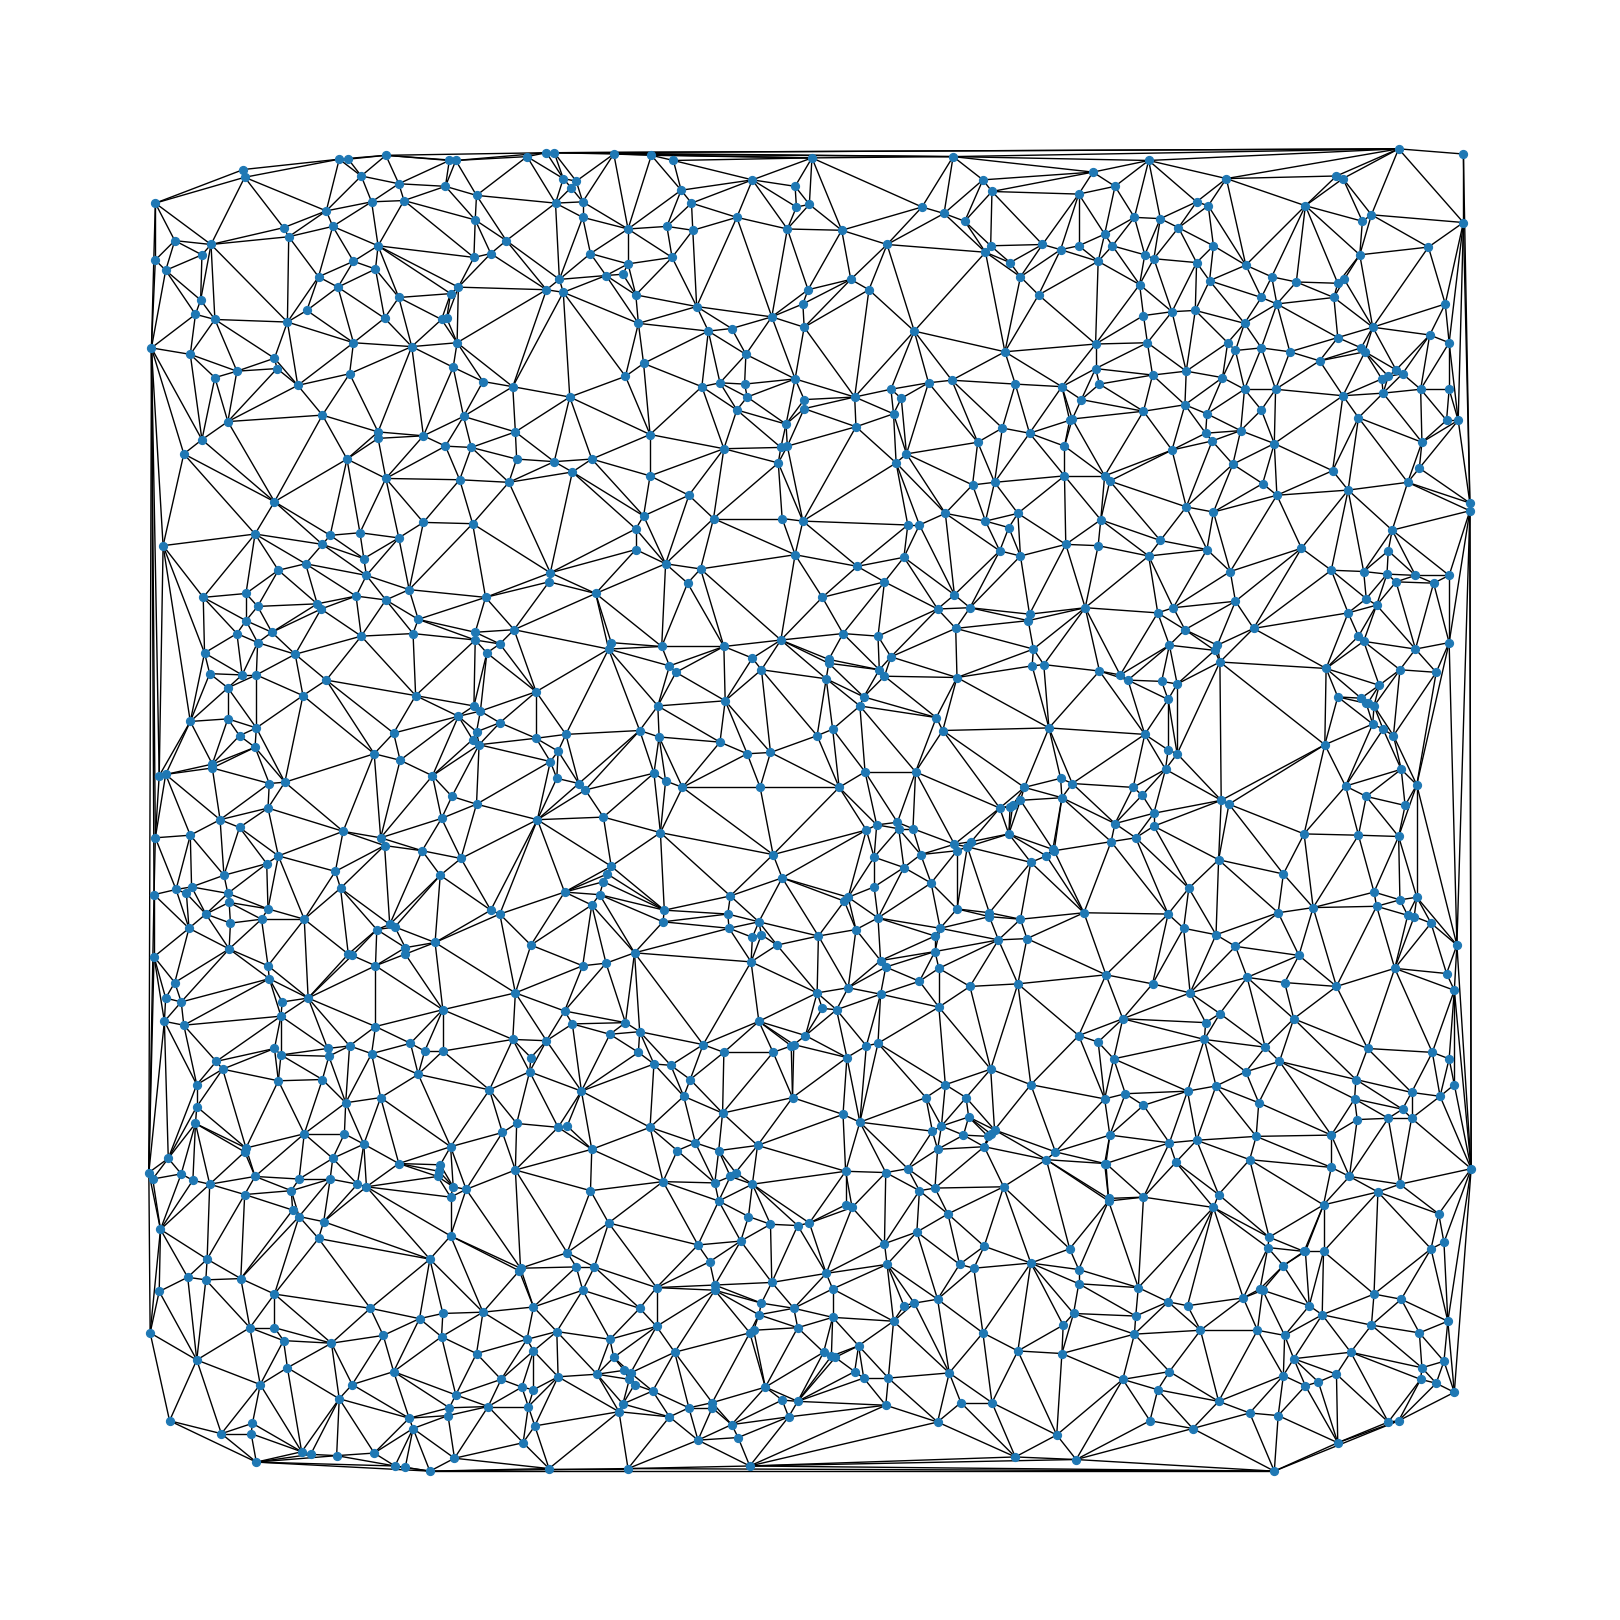

In [ ]:
plt.figure(figsize=(16, 16))
nx.draw(S, pos={n: n for n in S.nodes}, node_size=32)

### Graphs equality

In [ ]:
G.remove_node(v)

In [ ]:
nx.utils.graphs_equal(G, S)

True